# Assignment1_160204093_Minimum Distance Classifier

Read file from gdrive

In [16]:
from google.colab import drive
drive.mount('/content/gdrive')
# change working directory on the drive
%cd '/content/gdrive/My Drive/Data/'

# read train.txt file line by line
with open('train.txt', "r") as train:
    FileasList = train.readlines()

# split the string and store it into another list classwise
train = []
train_x1 = []
train_y1 = []
train_x2 = []
train_y2 = []
for i in range(len(FileasList)):
  train.append(FileasList[i].split())
  if(train[i][2] == '1'):
    train_x1.append(int(train[i][0]))
    train_y1.append(int(train[i][1]))
  else:
    train_x2.append(int(train[i][0]))
    train_y2.append(int(train[i][1]))

# read test.txt file line by line
with open('test.txt', "r") as test:
    FileasList = test.readlines()

# split the string and store it into another list
test = []
test_x = []
test_y = []
test_class = []
for i in range(len(FileasList)):
  test.append(FileasList[i].split())
  test_x.append(int(test[i][0]))
  test_y.append(int(test[i][1]))
  test_class.append(int(test[i][2]))



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Data


Plotting all sample points from train data and mean class

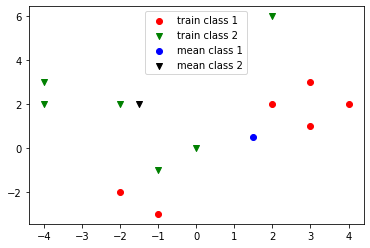

In [17]:
import matplotlib.pyplot as plt

plt.scatter(train_x1, train_y1, c = 'r', marker = 'o', label = 'train class 1')
plt.scatter(train_x2, train_y2, c = 'g', marker = 'v', label = 'train class 2')
plt.legend(loc = 'best')


# Mean of class 1 and class 2
def average(lst): 
  return sum(lst) / len(lst)
x1_mean = average(train_x1)
y1_mean = average(train_y1)
x2_mean = average(train_x2)
y2_mean = average(train_y2)

plt.scatter(x1_mean, y1_mean, c = 'b', marker = 'o', label = 'mean class 1')
plt.scatter(x2_mean, y2_mean, c = 'black', marker = 'v', label = 'mean class 2')
plt.legend(loc = 'upper center')


Classifying Test Data Points

In [18]:
import numpy as np
m1 = np.array([x1_mean, y1_mean])
m2 = np.array([x2_mean, y2_mean])
test_classify = []

for i in range(len(test_x)):
  x = np.array([test_x[i],test_y[i]])
  g1 =  np.dot(np.transpose(m1), x) - (.5 * ( np.dot(np.transpose(m1), m1) ) )
  g2 =  np.dot(np.transpose(m2), x) - (.5 * ( np.dot(np.transpose(m2), m2) ) )

  if(g1 > g2):
    test_classify.append(1)
  else:
    test_classify.append(2)


Plotting Test Data

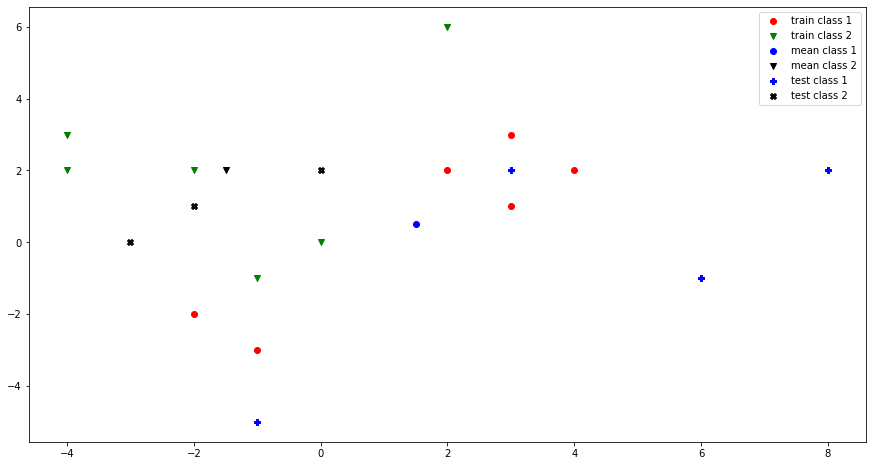

In [19]:
test_x1 = []
test_y1 = []
test_x2 = []
test_y2 = []
for i in range(len(test_classify)):
  if(test_classify[i] == 1):
    test_x1.append(test_x[i])
    test_y1.append(test_y[i])
  else:
    test_x2.append(test_x[i])
    test_y2.append(test_y[i])

plt.figure(figsize=(15,8))
# train class
plt.scatter(train_x1, train_y1, c = 'r', marker = 'o', label = 'train class 1')
plt.scatter(train_x2, train_y2, c = 'g', marker = 'v', label = 'train class 2')

# mean class
plt.scatter(x1_mean, y1_mean, c = 'b', marker = 'o', label = 'mean class 1')
plt.scatter(x2_mean, y2_mean, c = 'black', marker = 'v', label = 'mean class 2')

# test class
plt.scatter(test_x1, test_y1, c = 'b', marker = 'P', label = 'test class 1')
plt.scatter(test_x2, test_y2, c = 'black', marker = 'X', label = 'test class 2')
plt.legend(loc = 'upper right')



Plotting Decision Boundary

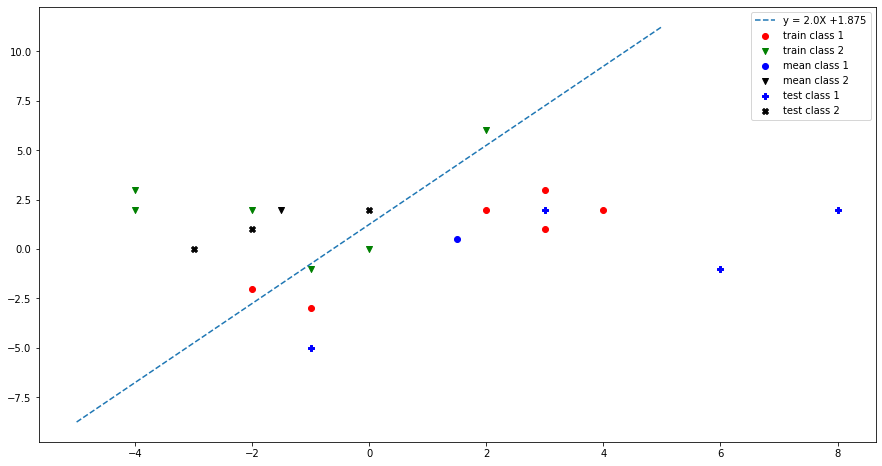

In [20]:
c = .5 * ( np.dot(np.transpose(m1), m1) - ( np.dot(np.transpose(m2), m2)  ) )
x = np.transpose(m1) - np.transpose(m2)
z = np.linspace(-5,5,10)
y = (x[0]*z - c)/(x[1] * (-1))

# equation
w0 = ""
if(c<0):
  w0 = "X +"
else:
  w0 = "X -"
eqn = "y = "  + str((x[0]/(-1 * x[1]))) + w0 + str(abs(c))


plt.figure(figsize=(15,8))

# train class
plt.scatter(train_x1, train_y1, c = 'r', marker = 'o', label = 'train class 1')
plt.scatter(train_x2, train_y2, c = 'g', marker = 'v', label = 'train class 2')

# mean class
plt.scatter(x1_mean, y1_mean, c = 'b', marker = 'o', label = 'mean class 1')
plt.scatter(x2_mean, y2_mean, c = 'black', marker = 'v', label = 'mean class 2')

# test class
plt.scatter(test_x1, test_y1, c = 'b', marker = 'P', label = 'test class 1')
plt.scatter(test_x2, test_y2, c = 'black', marker = 'X', label = 'test class 2')
plt.legend(loc = 'upper right')

# Decision Boundary
plt.plot(z, y, '--', label = eqn)
plt.legend(loc = 'upper right')

Accuracy of our model

In [21]:
n = len(test_class)
rc = 0
for i in range(n):
  if(test_class[i] == test_classify[i]):
    rc += 1
ac = (rc * 100)/n
ac = formatted_float = "{:.2f}".format(ac)
print("Accuracy of our model is: " + str(ac)+"%")


Accuracy of our model is: 85.71%
